In [1]:
%tensorflow_version 2.x

In [2]:
!wget https://www.dropbox.com/s/7joq8orap5urjwr/train.csv


--2021-06-26 07:30:47--  https://www.dropbox.com/s/7joq8orap5urjwr/train.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7joq8orap5urjwr/train.csv [following]
--2021-06-26 07:30:47--  https://www.dropbox.com/s/raw/7joq8orap5urjwr/train.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6a4df5ed327761d7990a80041d.dl.dropboxusercontent.com/cd/0/inline/BRInDJktntTBfbw90jb8xIYkzN8lQdzaH9mMwZFV_pr1CdPUrn62mx6uMnEydLWuErsaVgvxt2-FpQR_ZaVIvulqbUEK8lsqSEcM0G-IjTQSQ2FlJmJX8LyRYH9yHC6i1HeuZ4N-dU67szXRj8tUmrqe/file# [following]
--2021-06-26 07:30:48--  https://uc6a4df5ed327761d7990a80041d.dl.dropboxusercontent.com/cd/0/inline/BRInDJktntTBfbw90jb8xIYkzN8lQdzaH9mMwZFV_pr1CdPUrn62mx6uMnEydLWuErsaVgvxt2-FpQR_ZaVIvulqbUEK8lsqSEc

In [3]:
import pandas as pd       

In [4]:
%cd /content

/content


In [5]:
x = pd.read_csv("/content/train.csv")

In [6]:
x.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [7]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

** Data Preparation**


In [8]:
#counting the number of words in each sentense for Question_text Column
x['q_n_words'] = x['question_text'].apply(lambda row: len(row.split(" ")))

In [9]:
print(min(x["q_n_words"]))

1


In [10]:
print(max(x["q_n_words"]))

122


In [11]:
x[x['q_n_words']== 1]

,qid,question_text,target,q_n_words
420816,527aac2ce6f12f789fe5,"""",1,1
662237,81b6948ec20fdbe7c393,[math]24-7=?[/math],1,1
995257,c309469a202434b5f1d2,W,1,1


In [12]:
x[x['q_n_words']== 122]

,qid,question_text,target,q_n_words
522266,663c7523d48f5ee66a3e,"In ""Star Trek 2013"" why did they :\n\n*Spoiler...",0,122


In [13]:
x = x.drop(labels=[522266], axis=0)

In [ ]:
# clean up captions

In [14]:
from string import punctuation 

In [15]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
import re

In [17]:
x['question_text']=x['question_text'].apply(lambda x:re.sub("["+punctuation+"]",' ',x))

In [18]:
x['question_text']=x['question_text'].apply(lambda x:re.sub("\d",' ',x))

In [19]:
x['question_text']=x['question_text'].apply(lambda x:re.sub("\s+",' ',x))

In [20]:
x['question_text']=x['question_text'].str.lower()

In [21]:
x['question_text']

0          how did quebec nationalists see their province...
1          do you have an adopted dog how would you encou...
2          why does velocity affect time does velocity af...
3          how did otto von guericke used the magdeburg h...
4          can i convert montra helicon d to a mountain b...
                                 ...                        
1306117    what other technical skills do you need as a c...
1306118    does ms in ece have good job prospects in usa ...
1306119                            is foam insulation toxic 
1306120    how can one start a research project based on ...
1306121    who wins in a battle between a wolverine and a...
Name: question_text, Length: 1306121, dtype: object

In [22]:
size = x.q_n_words.unique()

In [23]:
size = size.mean()

In [24]:
# this gives the average of maximum number of words in a sentense
size

32.609375

In [25]:
x.target.value_counts()

0    1225311
1      80810
Name: target, dtype: int64

In [26]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Activation, Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd
from numpy import array

from sklearn.model_selection import train_test_split

In [27]:
x['question_text']

0          how did quebec nationalists see their province...
1          do you have an adopted dog how would you encou...
2          why does velocity affect time does velocity af...
3          how did otto von guericke used the magdeburg h...
4          can i convert montra helicon d to a mountain b...
                                 ...                        
1306117    what other technical skills do you need as a c...
1306118    does ms in ece have good job prospects in usa ...
1306119                            is foam insulation toxic 
1306120    how can one start a research project based on ...
1306121    who wins in a battle between a wolverine and a...
Name: question_text, Length: 1306121, dtype: object

In [28]:
text = x['question_text'].tolist()
text[:2]

['how did quebec nationalists see their province as a nation in the s ',
 'do you have an adopted dog how would you encourage people to adopt and not shop ']

In [29]:
y = x['target']

In [30]:
token = Tokenizer()
token.fit_on_texts(text)

In [31]:
vocab_size = len(token.word_index)+1
vocab_size

190288

In [ ]:
#print(token.word_index)

In [32]:
encoded_text = token.texts_to_sequences(text)

In [33]:
#checking encoding for 1st 30 sentense
print(encoded_text[:30])

[[9, 50, 6514, 7013, 157, 57, 5962, 37, 4, 1137, 6, 1, 27], [11, 14, 24, 30, 3808, 470, 9, 36, 14, 3611, 38, 5, 3043, 10, 46, 1814], [16, 26, 1969, 370, 72, 26, 1969, 370, 444, 5439], [9, 50, 12425, 8102, 48968, 121, 1, 37947, 26216], [15, 8, 1108, 40770, 89826, 355, 5, 4, 3079, 1499, 49, 99, 1445, 1, 9178], [3, 8908, 3836, 751, 18248, 48969, 23, 89827, 13, 2593], [16, 26, 107, 2507, 1618, 1424, 2389, 33, 4227, 66, 26, 46, 11, 1, 141, 13, 1131, 882], [3, 17, 1918, 20, 8, 2895, 23, 5712, 18, 12546, 222, 12086, 12, 3619], [3, 40, 203, 4, 183, 37, 6430, 18995, 10, 20, 54, 9, 3, 19, 129, 73, 6430, 24573], [3, 17, 99, 56, 23, 24, 14, 91, 117, 6, 65, 2113, 14833, 14, 1353, 3102, 5, 1, 38, 14, 643, 1684, 888, 18249, 57, 1074, 1031, 54, 14, 34, 5, 24, 192, 109, 29, 81, 10, 103, 6759, 45, 6463, 9, 50, 145, 165], [2, 15, 14, 155, 47, 2663], [9, 90, 1, 12426, 8014, 3132], [2, 3, 1, 6908, 647, 2559, 201, 2586, 13, 111, 85, 2876], [15, 52, 79, 137, 2499, 284, 4806, 37, 4, 2591, 37, 296, 37, 13, 238

In [34]:
#padding is done to make sure length of the all the sentenses is equal.
max_length = 33
X = pad_sequences(encoded_text, maxlen=max_length, padding="post")

In [35]:
print(X)

[[    9    50  6514 ...     0     0     0]
 [   11    14    24 ...     0     0     0]
 [   16    26  1969 ...     0     0     0]
 ...
 [    3  7618 11398 ...     0     0     0]
 [    9    15    58 ...     0     0     0]
 [   41  4852     6 ...     0     0     0]]


**using Glove Vectors**

In [36]:
!wget https://www.dropbox.com/s/sroxq70yyw9cq5r/glove.6B.100d.txt

--2021-06-26 07:32:46--  https://www.dropbox.com/s/sroxq70yyw9cq5r/glove.6B.100d.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/sroxq70yyw9cq5r/glove.6B.100d.txt [following]
--2021-06-26 07:32:46--  https://www.dropbox.com/s/raw/sroxq70yyw9cq5r/glove.6B.100d.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9fc72e960d2c9b9584b7426b44.dl.dropboxusercontent.com/cd/0/inline/BRJtShgx8Wh3QNzouesLBiYibfYA3Y-5qOZ3bbvLRF9JGKBEKRy13wPB54jnbaaWjEStjksKV_JJVTuH8Ut6o7gU_ciT_hK4asBM-71G_jIpRx80IGN839s-tUTnOBuyHI92XZxAftFIgcZK7YbYTG2O/file# [following]
--2021-06-26 07:32:46--  https://uc9fc72e960d2c9b9584b7426b44.dl.dropboxusercontent.com/cd/0/inline/BRJtShgx8Wh3QNzouesLBiYibfYA3Y-5qOZ3bbvLRF9JGKBEKRy13wPB54jnbaaWjEStjksKV_J

In [37]:
glove_vector = dict()

In [38]:
%%time
file = open('glove.6B.100d.txt', encoding= "utf-8")

for line in file:
  values = line.split()
  word = values[0]
  vectors = np.asarray(values[1:])
  glove_vector[word] = vectors
file.close()

CPU times: user 7.39 s, sys: 1.14 s, total: 8.53 s
Wall time: 8.54 s


In [39]:
len(glove_vector.keys())

400000

In [40]:
#randomly checking the vector shape of random words
glove_vector.get("else").shape

(100,)

**Extacting required vector keys**


In [41]:
word_vector_matrix = np.zeros((vocab_size, 100))

In [42]:
for word, index in token.word_index.items():
  vectors = glove_vector.get(word)
  if vectors is not None:
    word_vector_matrix[index] = vectors
  else:
    print(word)

Streaming output truncated to the last 5000 lines.
விளையாட்டு
விளக்கம்
ஆன்லைன்
transalted
shatabisha
surveilance
xjltu
flucked
milagai
bajji
rounds…
outpsoken
frighting
industion
compiller
nalhar
zoarastrians
basedstickman
gekwetst
rangoons
farty
jyw
filebase
maxscale
vardaska
chemistry​
huntzbergers
bestbrand
macrogen
litterman
hologramic
metrecloth
noone’s
carcku
qiteng
ecommorce
sorcerer‘s
‘chocolate
muffin’
“side
hoe”
brazille
abjosh
chirchik
sheridan’s
chagatan
wortb
hackos
testcases
baymard
topsheet
cellsea
“lose
fast”
“adhd”
pakistainies
mareal
tauba
sufaces
deshabhimani
checzhoslovakia
pemc
“philosophical
argument”
malovabay
abtibiotics
edto
bavafia
boddeybilding
bulkin
mussle
unitad
ankanang
kunchai
divivde
hugedomains
kulra
dabka
law”
alevel
kunjal
oathkeeper
partinogenesis
wallance
“paradox
complex”
threre
dotzenrod
jibo
departmentof
‘duty
care’
cockroachs
equat
bathaday
whopped
femel
artiry
homer’s
jplt
nihonggo
qulaity
yahweh’s
stantec
splited
spacemaker
prelife
mnipal
shm

###Building the Model

In [43]:
X

array([[    9,    50,  6514, ...,     0,     0,     0],
       [   11,    14,    24, ...,     0,     0,     0],
       [   16,    26,  1969, ...,     0,     0,     0],
       ...,
       [    3,  7618, 11398, ...,     0,     0,     0],
       [    9,    15,    58, ...,     0,     0,     0],
       [   41,  4852,     6, ...,     0,     0,     0]], dtype=int32)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 19, test_size = 0.2, stratify = y)

In [45]:
from keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

In [49]:
vec_size = 100

model = Sequential()
model.add(Embedding(vocab_size, vec_size, input_length = max_length, weights = [word_vector_matrix], trainable = False))
model.add(Conv1D(64, 8, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))

model.add(Conv1D(32,8, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(16, activation='relu'))

model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer = Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'] )


In [50]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 33, 100)           19028800  
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 26, 64)            51264     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 13, 64)            0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 13, 64)            0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 6, 32)             16416     
_________________________________________________________________
dropout_5 (Dropout)          (None, 6, 32)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 6, 16)            

In [51]:
model_history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_test, y_test), callbacks = earlystop)

Epoch 1/30
32653/32653 [==============================] - 294s 9ms/step - loss: 0.1568 - accuracy: 0.9431 - val_loss: 0.1457 - val_accuracy: 0.9478
Epoch 2/30
32653/32653 [==============================] - 295s 9ms/step - loss: 0.1383 - accuracy: 0.9466 - val_loss: 0.1402 - val_accuracy: 0.9458
Epoch 3/30
32653/32653 [==============================] - 298s 9ms/step - loss: 0.1327 - accuracy: 0.9482 - val_loss: 0.1456 - val_accuracy: 0.9470
Epoch 4/30
32653/32653 [==============================] - 301s 9ms/step - loss: 0.1296 - accuracy: 0.9492 - val_loss: 0.1436 - val_accuracy: 0.9494
Epoch 5/30
32653/32653 [==============================] - 302s 9ms/step - loss: 0.1272 - accuracy: 0.9500 - val_loss: 0.1457 - val_accuracy: 0.9467
Restoring model weights from the end of the best epoch.
Epoch 00005: early stopping


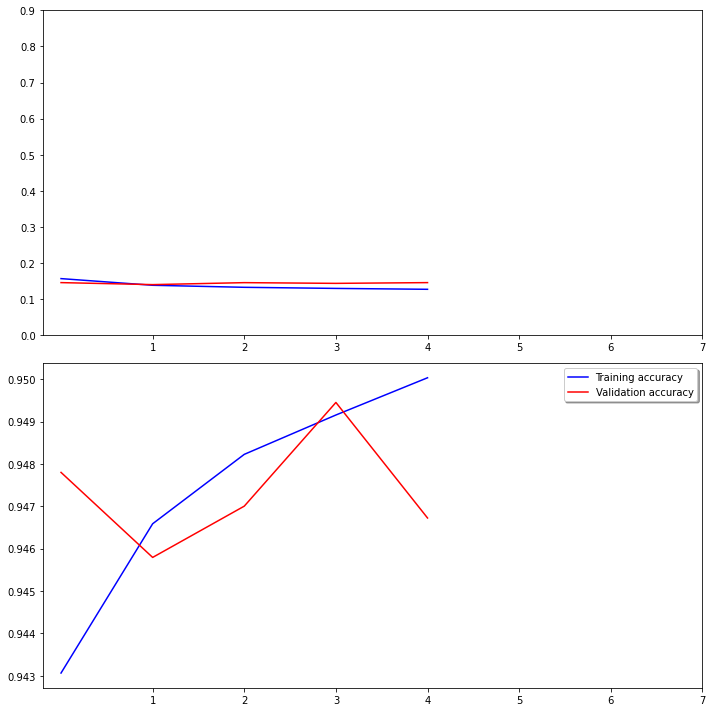

In [93]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
ax1.plot(model_history.history['loss'], color='b', label="Training loss")
ax1.plot(model_history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, 8, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(model_history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(model_history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, 8, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [ ]:
# Saving the model 

In [94]:
from tensorflow.keras.models import model_from_json

In [95]:
model_json = model.to_json()

In [99]:
with open("spam_filter.json", "w") as json_file:
    json_file.write(model_json)

In [100]:
model.save_weights

<bound method Model.save_weights of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f4a66cb5850>>

In [101]:
model.save_weights("spam_filter.h5")